In [1]:
decision_to_int = {
    "Triangular finishing early": 0,
    "Trapezoidal finishing early": 2,
    "Trapezoidal direct hit": 4,
    "Triangular direct hit": 6,
    "Triangular too slow": 8,
    "Trapezoidal too slow": 10,
    "Straight too slow": 12,
}


def parse_data(data: str):
    lines = [line for line in data.split("\n")]
    alpha = []
    diff = []
    x = []
    y = []
    x_decision = []
    y_decision = []
    for i, line in enumerate(lines):
        if line == "":
            continue
        if line[0] in set("0123456789"):
            parsed = [float(vel) for vel in line.strip().replace(",", ".").split(" ")]
            alpha.append(parsed[0])
            diff.append(parsed[1])
            x.append(parsed[2])
            y.append(parsed[3])
            if i > 1 and lines[i - 2][0] not in set("0123456789"):
                x_decision.append(decision_to_int[lines[i - 2]])
                y_decision.append(decision_to_int[lines[i - 1]])
    return (alpha, diff, x, y) if len(x_decision) == 0 else (alpha, diff, x, y, x_decision, y_decision)


with open("data/s1.0_0.0_v0.5_0.0.txt") as file:
    data = parse_data(file.read())
    if len(data) > 4:
        for i, d in enumerate(data[0]):
            if data[4][i] == 8:
                print(d)


In [2]:
from matplotlib import pyplot as plt


def plot(data: tuple):
    plt.figure(figsize=(15, 10))
    plt.ylim((-5, 15))
    if (len(data) > 4):
        plt.plot(data[0], data[4], label="x-d", color="yellow")
        plt.plot(data[0], data[5], label="y-d", color="blue")

    plt.plot(data[0], data[2], label="x", color="yellow")
    plt.plot(data[0], data[3], label="y", color="blue")
    plt.plot(data[0], data[1], label="diff", color="red")

    plt.axhline(y=0, color="black")
    plt.legend()

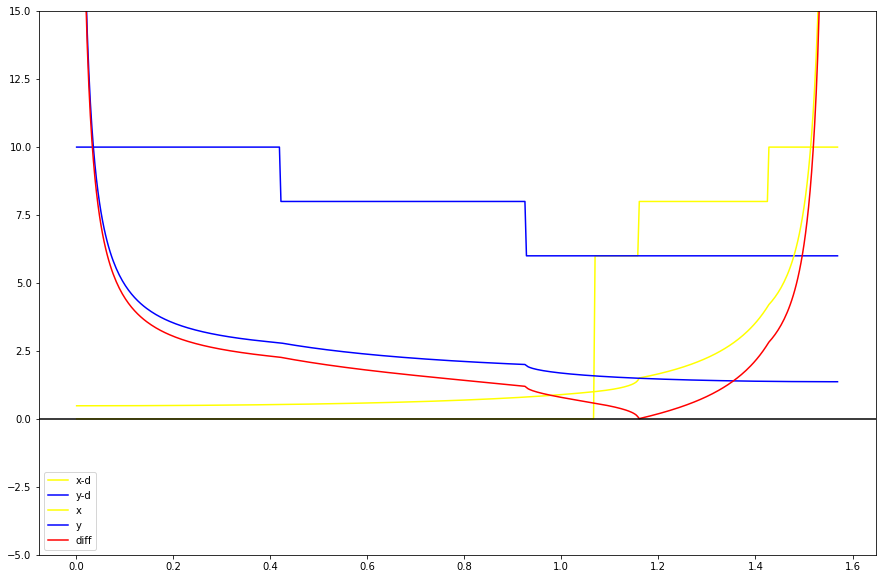

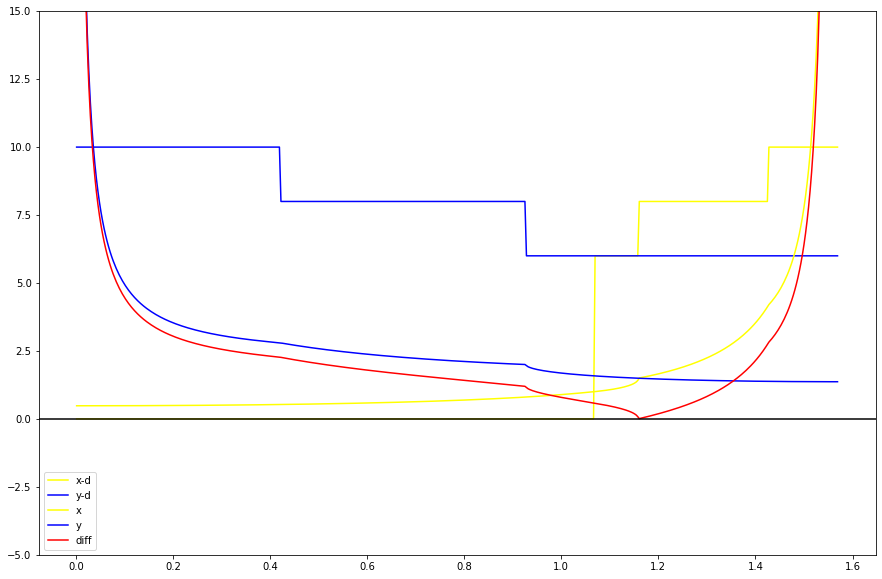

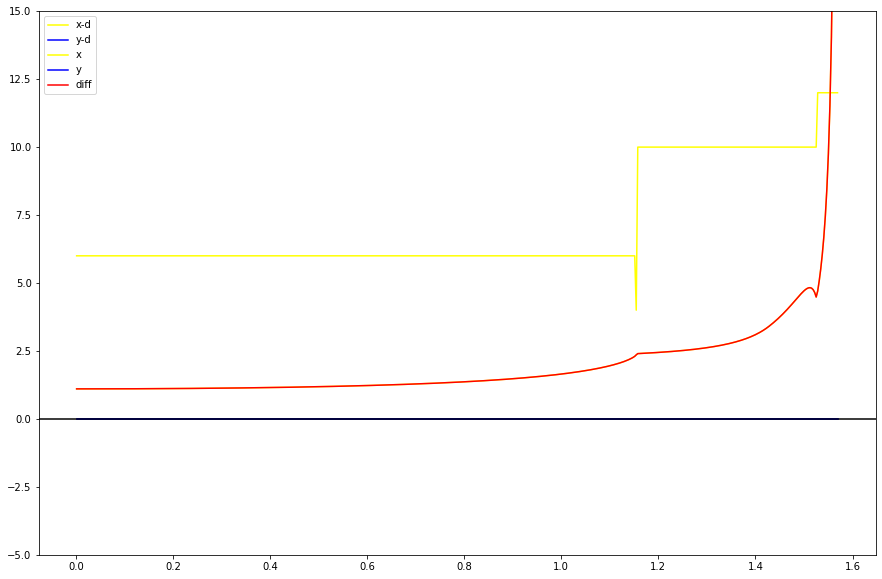

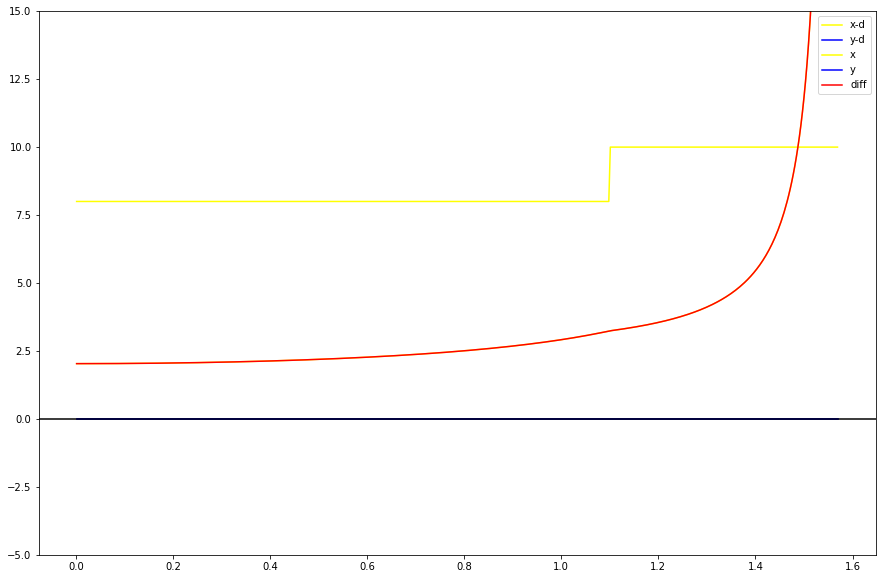

In [3]:
with open("data/s0.0_1.0_v0.5_0.0.txt") as file:
    plot(parse_data(file.read()))
with open("data/s0.0_1.0_v-0.5_0.0.txt") as file:
    plot(parse_data(file.read()))
with open("data/s1.0_0.0_v0.5_0.0.txt") as file:
    plot(parse_data(file.read()))
with open("data/s1.0_0.0_v-0.5_0.0.txt") as file:
    plot(parse_data(file.read()))

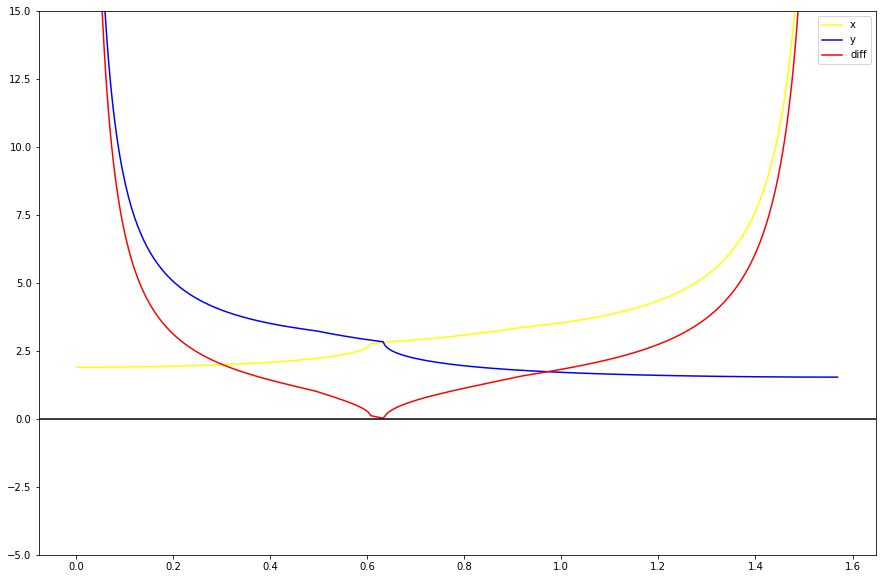

In [4]:

with open("data/debug.txt") as file:
    plot(parse_data(file.read()))